In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [3]:
import urllib
import json
import datetime
import pandas as pd
from pandas.io.json import json_normalize
import math
import time
from math import cos
from pandas import DataFrame

In [2]:
map_df = pd.read_csv('TorontoMap.csv')

In [3]:
map_df.head()

,Unnamed: 0,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,0,M3A,North York,Parkwoods,43.753259,-79.329656
1,1,M4A,North York,Victoria Village,43.725882,-79.315572
2,2,M5A,Downtown Toronto,Harbourfront,43.654260,-79.360636
3,3,M5A,Downtown Toronto,Regent Park,43.654260,-79.360636
4,4,M6A,North York,Lawrence Heights,43.718518,-79.464763


In [4]:
map_df['Neighbourhood'] = map_df['Neighbourhood'].str.replace('\n','')


In [5]:
#Foursquare Credentials
CLIENT_ID = 'PTX5DHM4UGPITUVP1GY45OW0QT3QEKNKTWK00BD44UIW1UES' # Foursquare ID
CLIENT_SECRET = 'WXXXJLFVJY5PNX2C10M5XX3MOSV30JXLKNX1BBB23RN3UL5V' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('client_id: ' + CLIENT_ID)
print('client_secret:' + CLIENT_SECRET)

Your credentails:
client_id: PTX5DHM4UGPITUVP1GY45OW0QT3QEKNKTWK00BD44UIW1UES
client_secret:WXXXJLFVJY5PNX2C10M5XX3MOSV30JXLKNX1BBB23RN3UL5V


In [6]:
LIMIT = 100
radius = 500
lat = 43.654260
lng = -79.360636
category_id = '4bf58dd8d48988d1fa941735'

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&categoryId={}&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            category_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'], 
            v['venue']['id'],
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude',
                  'Venue ID',
                  'Venue Category']
    
    return(nearby_venues)

In [7]:
Toronto_venues = getNearbyVenues(names=map_df['Neighbourhood'],
                                   latitudes=map_df['Latitude'],
                                   longitudes=map_df['Longitude']
                                  )

Parkwoods
Victoria Village
Harbourfront
Regent Park
Lawrence Heights
Lawrence Manor
Queen's Park
Islington Avenue
Rouge
Malvern
Don Mills North
Woodbine Gardens
Parkview Hill
Ryerson
Garden District
Glencairn
Cloverdale
Islington
Martin Grove
Princess Gardens
West Deane Park
Highland Creek
Rouge Hill
Port Union
Flemingdon Park
Don Mills South
Woodbine Heights
St. James Town
Humewood-Cedarvale
Bloordale Gardens
Eringate
Markland Wood
Old Burnhamthorpe
Guildwood
Morningside
West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor
Downsview North
Wilson Heights
Thorncliffe Park
Adelaide
King
Richmond
Dovercourt Village
Dufferin
Scarborough Village
Fairview
Henry Farm
Oriole
Northwood Park
York University
East Toronto
Harbourfront East
Toronto Islands
Union Station
Little Portugal
Trinity
East Birchmount Park
Ionview
Kennedy Park
Bayview Village
CFB Toronto
Downsview East
The Danforth West
Riverdale
Design E

In [9]:
Toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue ID,Venue Category
0,Harbourfront,43.654260,-79.360636,Distillery Sunday Market,43.650075,-79.361832,4c3e1eaa6faac9b66dc60d76,Farmers Market
1,Regent Park,43.654260,-79.360636,Distillery Sunday Market,43.650075,-79.361832,4c3e1eaa6faac9b66dc60d76,Farmers Market
2,Ryerson,43.657162,-79.378937,The Farmers’ Market at Ryerson,43.657871,-79.379506,4e01172b88776240d3f3f53d,Farmers Market
3,Ryerson,43.657162,-79.378937,Fruit Express Plus,43.659182,-79.382910,4c1e1bf663750f476e30b967,Farmers Market
4,Garden District,43.657162,-79.378937,The Farmers’ Market at Ryerson,43.657871,-79.379506,4e01172b88776240d3f3f53d,Farmers Market


In [11]:
fm_df = Toronto_venues[Toronto_venues['Venue Category'].str.contains("Farmers Market")].reset_index(drop=True)

fm_df

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue ID,Venue Category
0,Harbourfront,43.654260,-79.360636,Distillery Sunday Market,43.650075,-79.361832,4c3e1eaa6faac9b66dc60d76,Farmers Market
1,Regent Park,43.654260,-79.360636,Distillery Sunday Market,43.650075,-79.361832,4c3e1eaa6faac9b66dc60d76,Farmers Market
2,Ryerson,43.657162,-79.378937,The Farmers’ Market at Ryerson,43.657871,-79.379506,4e01172b88776240d3f3f53d,Farmers Market
3,Ryerson,43.657162,-79.378937,Fruit Express Plus,43.659182,-79.382910,4c1e1bf663750f476e30b967,Farmers Market
4,Garden District,43.657162,-79.378937,The Farmers’ Market at Ryerson,43.657871,-79.379506,4e01172b88776240d3f3f53d,Farmers Market
5,Garden District,43.657162,-79.378937,Fruit Express Plus,43.659182,-79.382910,4c1e1bf663750f476e30b967,Farmers Market
6,St. James Town,43.651494,-79.375418,St. Lawrence Market (North Building),43.648793,-79.371945,4bbe53a1848da593e522ea6d,Farmers Market
7,St. James Town,43.651494,-79.375418,St. Lawrence Market (South Building),43.648743,-79.371597,4ad4c062f964a520fbf720e3,Farmers Market
8,St. James Town,43.651494,-79.375418,Market Square,43.649231,-79.373001,4e42dd7eb0fbe97644d1b1b7,Farmers Market
9,St. James Town,43.651494,-79.375418,Ponesse Foods,43.648964,-79.371615,4beeb10635dc0f47261b405b,Farmers Market


In [12]:
fm_df.to_csv('FarmersMarketDF.csv')

In [7]:
fm_df = pd.read_csv('FarmersMarketDF.csv')
fm_df.head()

,Unnamed: 0,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue ID,Venue Category
0,0,Harbourfront,43.654260,-79.360636,Distillery Sunday Market,43.650075,-79.361832,4c3e1eaa6faac9b66dc60d76,Farmers Market
1,1,Regent Park,43.654260,-79.360636,Distillery Sunday Market,43.650075,-79.361832,4c3e1eaa6faac9b66dc60d76,Farmers Market
2,2,Ryerson,43.657162,-79.378937,The Farmers’ Market at Ryerson,43.657871,-79.379506,4e01172b88776240d3f3f53d,Farmers Market
3,3,Ryerson,43.657162,-79.378937,Fruit Express Plus,43.659182,-79.382910,4c1e1bf663750f476e30b967,Farmers Market
4,4,Garden District,43.657162,-79.378937,The Farmers’ Market at Ryerson,43.657871,-79.379506,4e01172b88776240d3f3f53d,Farmers Market


In [16]:
count_df = fm_df.groupby(['Neighborhood']).agg({'Venue ID': ['count']})
count_df

,Venue ID
,count
Neighborhood,
Adelaide,1
Berczy Park,5
Business Reply Mail Processing Centre 969 Eastern,1
Cabbagetown,1
Central Bay Street,2
Chinatown,4
Davisville,1
Design Exchange,2


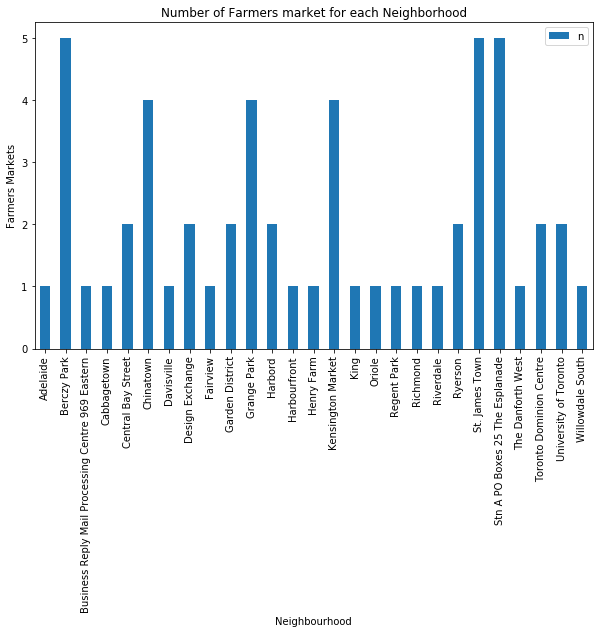

In [28]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

#find out how many Farmer's markets in each neighbourhood
count_df.plot(kind='bar', label='No of farmers markets', figsize=(10, 6))

plt.xlabel('Neighbourhood') # add to x-label to the plot
plt.ylabel('Farmers Markets') # add y-label to the plot
plt.legend("number of farmers markets")
plt.title('Number of Farmers market for each Neighborhood') # add title to the plot

plt.show()

In [4]:
latitude = 43.6532
longitude = -79.3832
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, venue in zip(fm_df['Venue Latitude'], fm_df['Venue Longitude'], fm_df['Venue']):
    label = '{}'.format(venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [8]:
#get most common venues nearby
LIMIT = 10
def getNearbyVenues(names, latitudes, longitudes, radius=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'NearByVenue Latitude', 
                  'NearByVenue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [9]:
# Run the function for each Venue

NearBy_venues = getNearbyVenues(names=fm_df['Venue'],
                                   latitudes=fm_df['Venue Latitude'],
                                   longitudes=fm_df['Venue Longitude']
                                  )

Distillery Sunday Market
Distillery Sunday Market
The Farmers’ Market at Ryerson
Fruit Express Plus
The Farmers’ Market at Ryerson
Fruit Express Plus
St. Lawrence Market (North Building)
St. Lawrence Market (South Building)
Market Square
Ponesse Foods
St. Lawrence Market (North Building)
St. Lawrence Market (South Building)
Family Foods
Ponesse Foods
Market Square
SickKids Farmers Market
Fruit Express Plus
Farmers Market
Farmers Market
Farmers Market
Fairview Mall Farmers' Market
Fairview Mall Farmers' Market
Fairview Mall Farmers' Market
Fruitland Market
Fruitland Market
Autum Market - Indoor Farmer Market
Metro Hall Farmer's Market
Autum Market - Indoor Farmer Market
Metro Hall Farmer's Market
North York Civic Centre Farmer's Market
Apple Tree Farmer's Market
U Of T Farmers Market
Everdale CSA
U Of T Farmers Market
Everdale CSA
Kensington Food Market
4 Life Natural Foods
Sunwah Fruit Market
Oxford Fruit
Kensington Food Market
4 Life Natural Foods
Sunwah Fruit Market
Oxford Fruit
Kens

In [13]:
NearBy_venues.head()

,Venue,Venue Latitude,Venue Longitude,NearByVenue Latitude,NearByVenue Longitude,Venue Category
0,Distillery Sunday Market,43.650075,-79.361832,43.650075,-79.361832,Farmers Market
1,Distillery Sunday Market,43.650075,-79.361832,43.649963,-79.361442,Coffee Shop
2,Distillery Sunday Market,43.650075,-79.361832,43.650067,-79.360723,Dessert Shop
3,Distillery Sunday Market,43.650075,-79.361832,43.650264,-79.362195,Park
4,Distillery Sunday Market,43.650075,-79.361832,43.649493,-79.361617,Pet Store


In [14]:
NearBy_venues.to_csv('NearByVenuesDF.csv')

In [31]:
NearBy_venues = pd.read_csv('NearByVenuesDF.csv')

In [32]:
NearBy_venues.groupby('Venue').count()

,Unnamed: 0,Venue Latitude,Venue Longitude,NearByVenue Latitude,NearByVenue Longitude,Venue Category
Venue,,,,,,
4 Life Natural Foods,30,30,30,30,30,30
Apple Tree Farmer's Market,2,2,2,2,2,2
Autum Market - Indoor Farmer Market,6,6,6,6,6,6
Distillery Sunday Market,12,12,12,12,12,12
Everdale CSA,8,8,8,8,8,8
Fairview Mall Farmers' Market,24,24,24,24,24,24
Family Foods,2,2,2,2,2,2
Farmers Market,6,6,6,6,6,6
Fruit Express Plus,30,30,30,30,30,30


In [33]:
NearBy_onehot = pd.get_dummies(NearBy_venues[['Venue Category']], prefix="", prefix_sep="")
NearBy_onehot['Venue'] = NearBy_venues['Venue'] 

fixed_columns = [NearBy_onehot.columns[-1]] + list(NearBy_onehot.columns[:-1])
NearBy_onehot = NearBy_onehot[fixed_columns]

In [34]:
NearBy_onehot.head()

,Venue,Art Gallery,Arts & Crafts Store,Asian Restaurant,Bakery,Bar,Beer Bar,Belgian Restaurant,Bookstore,Burger Joint,Burrito Place,Café,Caribbean Restaurant,Cheese Shop,Coffee Shop,College Rec Center,Comfort Food Restaurant,Department Store,Dessert Shop,Diner,Electronics Store,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Fruit & Vegetable Store,Furniture / Home Store,Garden,Greek Restaurant,Grocery Store,Gym / Fitness Center,Hot Dog Joint,Hotel,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Juice Bar,Memorial Site,Mexican Restaurant,Movie Theater,Organic Grocery,Park,Pet Store,Pharmacy,Plaza,Restaurant,Sandwich Place,Seafood Restaurant,Shopping Mall,Smoothie Shop,Snack Place,Spa,Sports Bar,Thai Restaurant,Vegetarian / Vegan Restaurant,Wine Bar,Wings Joint
0,Distillery Sunday Market,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Distillery Sunday Market,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Distillery Sunday Market,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Distillery Sunday Market,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Distillery Sunday Market,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
# Groupby mean frequency
NearBy_grouped = NearBy_onehot.groupby('Venue').mean().reset_index()
NearBy_grouped.head()

,Venue,Art Gallery,Arts & Crafts Store,Asian Restaurant,Bakery,Bar,Beer Bar,Belgian Restaurant,Bookstore,Burger Joint,Burrito Place,Café,Caribbean Restaurant,Cheese Shop,Coffee Shop,College Rec Center,Comfort Food Restaurant,Department Store,Dessert Shop,Diner,Electronics Store,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Fruit & Vegetable Store,Furniture / Home Store,Garden,Greek Restaurant,Grocery Store,Gym / Fitness Center,Hot Dog Joint,Hotel,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Juice Bar,Memorial Site,Mexican Restaurant,Movie Theater,Organic Grocery,Park,Pet Store,Pharmacy,Plaza,Restaurant,Sandwich Place,Seafood Restaurant,Shopping Mall,Smoothie Shop,Snack Place,Spa,Sports Bar,Thai Restaurant,Vegetarian / Vegan Restaurant,Wine Bar,Wings Joint
0,4 Life Natural Foods,0.000000,0.0,0.0,0.1,0.000000,0.0,0.1,0.0,0.1,0.1,0.100000,0.0,0.0,0.000000,0.0,0.1,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00,0.1,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.1,0.0,0.0
1,Apple Tree Farmer's Market,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.500000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
2,Autum Market - Indoor Farmer Market,0.000000,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.333333,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
3,Distillery Sunday Market,0.166667,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.166667,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.166667,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
4,Everdale CSA,0.000000,0.0,0.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.250000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0


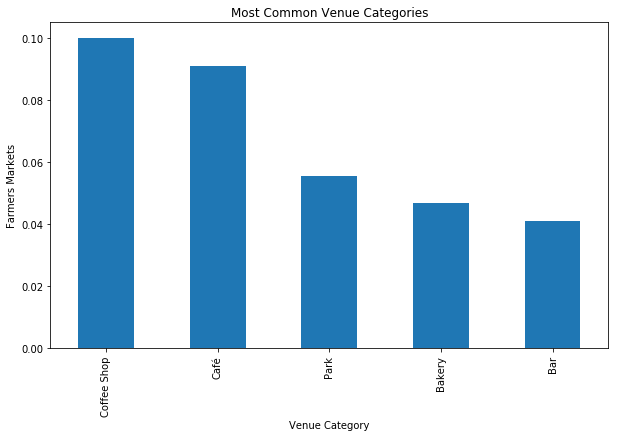

In [46]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

NearBySorted = NearBy_grouped.mean().sort_values(ascending=False)
NBSorted = NearBySorted[1:6]

#find out how many Farmer's markets in each neighbourhood
NBSorted.plot(kind='bar', label='No of farmers markets', figsize=(10, 6))


plt.xlabel('Venue Category') # add to x-label to the plot
plt.ylabel('Farmers Markets') # add y-label to the plot
#plt.legend('Near By Categories')
plt.title('Most Common Venue Categories') # add title to the plot

plt.show()

In [25]:
# Sort Venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [26]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Venue']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
NearBy_venues_sorted = pd.DataFrame(columns=columns)
NearBy_venues_sorted['Venue'] = NearBy_grouped['Venue']

for ind in np.arange(NearBy_grouped.shape[0]):
    NearBy_venues_sorted.iloc[ind, 1:] = return_most_common_venues(NearBy_grouped.iloc[ind, :], num_top_venues)

NearBy_venues_sorted.head()

,Venue,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,4 Life Natural Foods,Mexican Restaurant,Vegetarian / Vegan Restaurant,Fish Market,Grocery Store,Bakery
1,Apple Tree Farmer's Market,Park,Farmers Market,Wings Joint,Fruit & Vegetable Store,Fish Market
2,Autum Market - Indoor Farmer Market,Coffee Shop,Bar,Café,College Rec Center,Fruit & Vegetable Store
3,Distillery Sunday Market,Art Gallery,Park,Farmers Market,Dessert Shop,Coffee Shop
4,Everdale CSA,Thai Restaurant,Fish & Chips Shop,Bar,Café,Wings Joint


In [36]:
NearBy_venues_sorted.to_csv('NearByVenuesSortedDF.csv')

In [45]:
# set number of clusters
kclusters = 10

NearBy_grouped_clustering = NearBy_grouped.drop('Venue', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(NearBy_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([9, 4, 1, 7, 1, 9, 2, 0, 7, 6], dtype=int32)

In [ ]:
# add clustering labels
NearBy_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

NearBy_merged = fm_df

NearBy_merged = NearBy_merged.join(NearBy_venues_sorted.set_index('Venue'), on='Venue')

NearBy_merged.head() 

In [46]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(NearBy_merged['Venue Latitude'], NearBy_merged['Venue Longitude'], NearBy_merged['Venue'], NearBy_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [ ]:

def reviews(venue_id):
    
    s_venues = pd.DataFrame(columns=['Venue ID','Ratings'])
    
    likes_list=[]

    for item in venue_id:

        #s = item
        tips='https://api.foursquare.com/v2/venues/'
        params=dict(client_id=CLIENT_ID,client_secret=CLIENT_SECRET,v=VERSION)
        resp_tips=requests.get(url=tips+s, params=params).json()['response']['venue']['rating']
        print(resp_tips)
    
    s_venues = likes_list.append([{'Venue ID' : venue_id, 'Ratings' : resp_tips}])


return s_venues


In [128]:
s = '4bbe53a1848da593e522ea6d'
urlstr='https://api.foursquare.com/v2/venues/'
params=dict(client_id=CLIENT_ID,client_secret=CLIENT_SECRET,v=VERSION, limit=50)
resp_tips=requests.get(url=urlstr+s+'/tips', params=params).json()['response']
print(resp_tips)

{}


In [2]:
# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs:
    - wordcloud==1.4.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.3.9   |       hecc5488_0         146 KB  conda-forge
    certifi-2019.3.9           |           py36_0         149 KB  conda-forge
    conda-4.6.8                |           py36_0         876 KB  conda-forge
    openssl-1.1.1b             |       h14c3975_1         4.0 MB  conda-forge
    wordcloud-1.4.1            |           py36_0         324 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         5.4 MB

The following NEW packages will be INSTALLED:

  wordcloud          conda-forge/linux-64::wordcloud-1.4.1-py36_0

The following packages will be UPDATED:

  ca-certificates                  

In [14]:
#!wget --quiet https://github.com/amoussa80/github-example/blob/master/tips.txt -O tips.txt

Venue_tips = open('tips.txt', 'r').read()


In [7]:
# download file and save as alice_novel.txt
!wget --quiet https://ibm.box.com/shared/static/m54sjtrshpt5su20dzesl5en9xa5vfz1.txt -O alice_novel.txt

# open the file and read it into a variable alice_novel
alice_novel = open('alice_novel.txt', 'r').read()
    
print ('File downloaded and saved!')

File downloaded and saved!


In [15]:
stopwords = set(STOPWORDS)

In [16]:
# instantiate a word cloud object
tips_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
tips_wc.generate(Venue_tips)

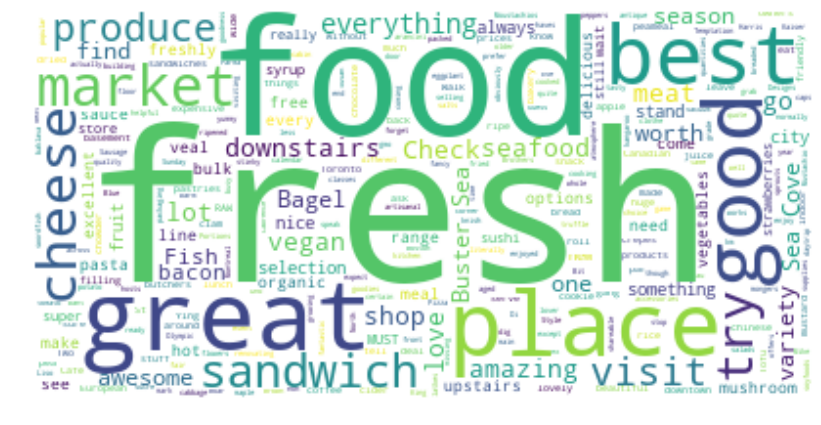

In [18]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(tips_wc, interpolation='bilinear')
plt.axis('off')
plt.show()